In [1]:
!git clone https://github.com/ultralytics/yolov5

%cd yolov5

!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Cloning into 'yolov5'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1110 (delta 17), reused 22 (delta 10), pack-reused 1075
Receiving objects: 100% (1110/1110), 3.45 MiB | 3.18 MiB/s, done.
Resolving deltas: 100% (734/734), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


In [3]:
!pip install -U -r /content/yolov5/requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-l6u7qzji
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-l6u7qzji
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r /content/yolov5/requirements.txt (line 2)) (0.29.20)
     |████████████████████████████████| 20.4MB 1.7MB/s 
     |████████████████████████████████| 43.7MB 42.5MB/s 
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r /content/yolov5/requirements.txt (line 5)) (1.5.1+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r /content/yolov5/requirements.txt (line 6)) (3.2.2)
     |████████████████████████████████| 2.2MB 41.9MB/s 
Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (from -r /content/yolov5/requirements.txt (line 8)) (2.2.2)
     |████████████████████████████████| 276kB 42.8MB/s 
Requ

In [2]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [3]:
!curl -L "https://public.roboflow.ai/ds/U4buOUxdxo?key=jEYUkLcoIb" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    777      0  0:00:01  0:00:01 --:--:--   777
100 19.1M  100 19.1M    0     0  7955k      0  0:00:02  0:00:02 --:--:-- 17.2M
Archive:  roboflow.zip
 extracting: test/images/e4029e591e9568b4_jpg.rf.38b756a0f97631981546c972c9ecd9a1.jpg  
 extracting: test/images/95bf6406c152cf40_jpg.rf.3834c6a0d56619c964611f5667f6e393.jpg  
 extracting: test/images/08c8b73e0c2e296e_jpg.rf.24496f1095ffd45262fd1f9d9865e94a.jpg  
 extracting: test/images/d66aabbb1f7299cc_jpg.rf.38b5dfbdf7b988873455d0caae38105d.jpg  
 extracting: test/images/cf165ec304d2b2dc_jpg.rf.26a644096c9f7c14dc93e7d87f9e974c.jpg  
 extracting: test/images/c094d0187caf81e3_jpg.rf.2cabd8d84aadded75295d97a9f462aad.jpg  
 extracting: test/images/a3cffcdbff959432_jpg.rf.3670bb831774cd754bf13150ae24ebe3.jpg  
 extracting: test/images/778f80f86cd35fca_jpg

In [7]:
!python /content/yolov5/train.py --img 627 --batch 4 --epochs 30  --data /content/data-2.yaml --cfg /content/yolov5x-4.yaml --weights yolov5x.pt --name yolov5x_clothing --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='/content/yolov5x-4.yaml', data='/content/data-2.yaml', device='', epochs=30, evolve=False, img_size=[627], multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-06 12:28:17.695291: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://lo

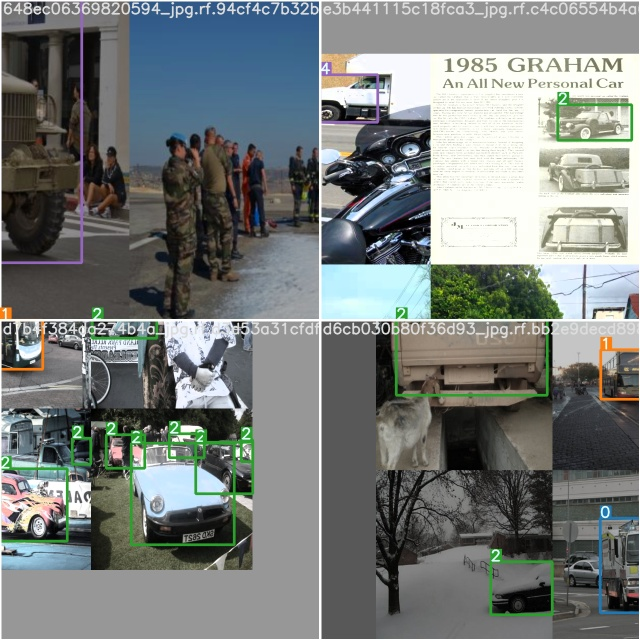

In [9]:
Image(filename='/content/train_batch1.jpg', width=900)

In [12]:
!python /content/yolov5/detect.py --weights /content/weights/last_yolov5x_clothing.pt --img 416 --conf 0.4 --source /content/photo-1449426468159-d96dbf08f19f.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/photo-1449426468159-d96dbf08f19f.jpg', view_img=False, weights='/content/weights/last_yolov5x_clothing.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/1 /content/photo-1449426468159-d96dbf08f19f.jpg: 288x416 1 Motorcycles, Done. (0.108s)
Results saved to /content/inference/output
Done. (0.722s)
